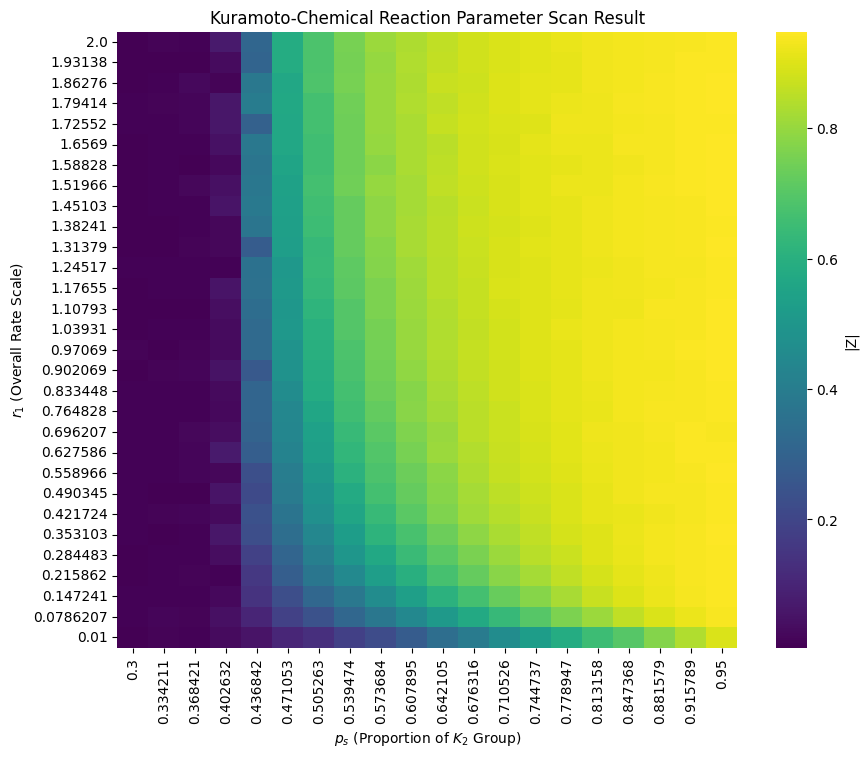

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# 1. 导入数据
# index_col=0 告诉 pandas 第一列 (rate_scale) 是行索引（Y轴变量）
try:
    # 假设您的文件在 /Users/YourName/Documents/MyProject/
    file_path = '/Users/xiroihs/Documents/K+K- shift/序参量随速率与比例/output_1/scan_results.csv'
    # 修改您的读取代码：
    df = pd.read_csv(file_path, index_col=0)
except FileNotFoundError:
    print("错误：未找到 'scan_results.csv' 文件。请确保文件与 Jupyter Notebook 在同一目录下。")
    # 如果找不到文件，在这里可以停止执行
    raise

# 2. 数据准备
# 列名 (X轴的 p_s 值) 默认是字符串，建议转换为浮点数
df.columns = df.columns.astype(float)

# 3. 绘制热图 (Heatmap)
plt.figure(figsize=(10, 8))

# .iloc[::-1] 用于反转行顺序。
# 这样可以确保 Y 轴（rate_scale）从图表底部向上递增，符合常规习惯。
sns.heatmap(
    df.iloc[::-1],
    cmap='viridis',            # 选择色图 (例如：'viridis', 'magma', 'jet')
    annot=False,               # 如果需要显示网格上的数值，请设为 True
    linewidths=0,            # 网格线宽度 (可选)
    cbar_kws={'label': '|Z|'} # 颜色条标签
)

# 4. 设置标签和标题
plt.xlabel('$p_s$ (Proportion of $K_2$ Group)')
plt.ylabel('$r_1$ (Overall Rate Scale)')
plt.title('Kuramoto-Chemical Reaction Parameter Scan Result')
plt.show()

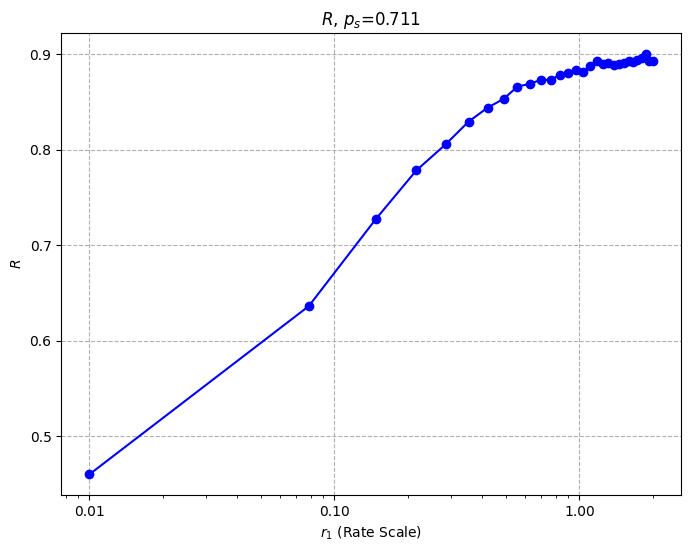

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 重新加载数据
# 注意: index_col=0 确保了 r1 (速率) 是 Y 轴数据
file_path = '/Users/xiroihs/Documents/K+K- shift/序参量随速率与比例/output_1/scan_results.csv'
# 修改您的读取代码：
df = pd.read_csv(file_path, index_col=0)

# 确保列名是浮点数 (虽然现在不用于选择，但用于标签)
df.columns = df.columns.astype(float) 

# --- 关键步骤 ---

# 2. 设定您想提取的 p_s 比例的位置
# 注意：Python/Pandas 的索引是从 0 开始的。
# 如果您想要“从左到右第 7 个” p，这里的索引就是 6。
p_index = 12  # 设定您想要的索引 (例如，第 7 个 p_s)

# 3. 提取数据
# iloc 是基于位置的索引：
# 第一个 ':' 表示选择所有行 (即所有速率 r1)
# 第二个参数 p_index 表示选择指定的列位置
R_vs_rate = df.iloc[:, p_index]

# 获取该列对应的 p_s 实际数值，用于图表标题
actual_p_value = df.columns[p_index]


# 4. 绘图
plt.figure(figsize=(8, 6))

# 调用 plot 并保存返回的 Axes 对象
ax = R_vs_rate.plot(
    marker='o',
    linestyle='-',
    color='blue'
)
# 1. 设置 X 轴为对数尺度
ax.set_xscale('log')

# 2. 设置 X 轴的刻度显示格式，防止出现过多科学计数法
ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.2f')) # 如果需要更精细的控制
# 5. 设置标签和标题
# 我们在标题中显示了实际的 p_s 数值，并精确到 3 位小数
plt.xlabel('$r_1$ (Rate Scale)')
plt.ylabel('$R$')
plt.title(f'$R$, $p_s$={actual_p_value:.3f}')
plt.grid(True, linestyle='--')
plt.show()